<a href="https://colab.research.google.com/github/horsinnaround/Thesis---a-two-layer-power-network/blob/main/thesis_week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install pandapower
import pandapower as pp
import networkx as nx
import pandapower.networks as pn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandapower.topology as top
# import networkx as nx
from pandapower import plotting
from pandapower.plotting import simple_plot, pf_res_plotly,simple_plotly
import random as rn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

In [ ]:
Net = pn.case30()

# Talk nonesence

In [ ]:
# Net.gen['slack_weight'] = [0,0.1]
# Net.gen['slack'] = [False,True]


In [ ]:
Net.gen

,name,bus,p_mw,vm_pu,sn_mva,min_q_mvar,max_q_mvar,scaling,slack,in_service,slack_weight,type,controllable,max_p_mw,min_p_mw
0,None,1,60.97,1.0,NaN,-20.0,60.0,1.0,False,True,0.0,None,True,80.0,0.0
1,None,21,21.59,1.0,NaN,-15.0,62.5,1.0,False,True,0.0,None,True,50.0,0.0
2,None,26,26.91,1.0,NaN,-15.0,48.7,1.0,False,True,0.0,None,True,55.0,0.0
3,None,22,19.20,1.0,NaN,-10.0,40.0,1.0,False,True,0.0,None,True,30.0,0.0
4,None,12,37.00,1.0,NaN,-15.0,44.7,1.0,False,True,0.0,None,True,40.0,0.0


In [ ]:
Net.gen['slack'].iloc[0] = True
Net.gen['slack_weight'].iloc[0] = 1


In [ ]:
# pp.drop_buses(Net, [1], drop_elements=True)
k = list(Net.gen['bus'])
k

[1, 21, 26, 22, 12]

In [ ]:
Net.gen['slack'].iloc[1]

False

In [ ]:
b = len(Net.line)

In [ ]:
np.random.randint(1, high=b-3, size=2, dtype=int)

array([ 3, 27])

In [ ]:
lem = [np.random.randint(1, high=b-3, size=3, dtype=int) for _ in range(200)]

In [ ]:
lem

In [ ]:
for v in [0,1,2,3,4]:
    plt.figure(figsize=(20,8))
    c = [None,v]
    for j in c:
        print(j)
        Net = Net = pn.case30()
        b = len(Net.line)
        name = []
        lens = []
        for i in range(175,200):
            if j != None:
                Net.gen['slack'].loc[j] = True
                Net.gen['slack_weight'].loc[j] = 1
            # jk = np.random.randint(1, high=b-3, size=2, dtype=int)
            pp.drop_lines(Net,lem[i])
            pp.rundcpp(net=Net)
            drop_lines = pp.overloaded_lines(Net)
            # print(drop_lines)
            pp.drop_lines(Net,drop_lines)
            pp.drop_out_of_service_elements(Net)
            pp.drop_inactive_elements(Net, respect_switches=True)
            # print(i+1,i+2,i+3,len(Net.line))
            name.append(f'{lem[i]}')
            lens.append(len(Net.line))
            Net = Net = pn.case30()
        plt.plot(name,lens,label=f'{j}')
        plt.xticks(ticks=np.arange(len(name)), labels=name);
        plt.xticks(rotation=90)
    plt.legend()
    plt.ylabel("Number of Edges")
    # plt.savefig(f'/content/temp-plot_{c}.png',bbox_inches='tight')
    plt.show()

In [ ]:
Net.ext_grid

,name,bus,vm_pu,va_degree,slack_weight,in_service,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar
0,None,0,1.0,0.0,1.0,True,80.0,0.0,150.0,-20.0


In [ ]:
lem = [np.random.randint(1, high=29, size=2, dtype=int) for _ in range(200)]

In [ ]:
for v in [0,1,2,3,4]:
    plt.figure(figsize=(20,8))
    c = [None,v]
    for j in c:
        print(j)
        Net = Net = pn.case30()
        b = len(Net.line)
        name = []
        lens = []
        for i in range(25):
            if j != None:
                Net.gen['slack'].loc[j] = True
                Net.gen['slack_weight'].loc[j] = 1
            # jk = np.random.randint(1, high=b-3, size=2, dtype=int)
            # pp.drop_lines(Net,lem[i])
            pp.drop_buses(Net, lem[i], drop_elements=True)
            pp.rundcpp(net=Net)
            drop_lines = pp.overloaded_lines(Net)
            # print(drop_lines)
            pp.drop_lines(Net,drop_lines)
            pp.drop_out_of_service_elements(Net)
            pp.drop_inactive_elements(Net, respect_switches=True)
            # print(i+1,i+2,i+3,len(Net.line))
            name.append(f'{lem[i]}')
            lens.append(len(Net.line))
            Net = Net = pn.case30()
        plt.plot(name,lens,label=f'{j}')
        plt.xticks(ticks=np.arange(len(name)), labels=name);
        plt.xticks(rotation=90)
    plt.legend()
    plt.ylabel("Number of Edges")
    plt.savefig(f'/content/temp-plot2{c}.png',bbox_inches='tight')
    plt.show()

In [ ]:
pp.rundcpp(net=Net)
drop_lines = pp.overloaded_lines(Net)

In [ ]:
pp.drop_lines(Net,drop_lines)

In [ ]:
pp.drop_out_of_service_elements(Net)

In [ ]:
pp.drop_inactive_elements(Net, respect_switches=True)

In [ ]:

pf_res_plotly(Net)

# Taks about slacks

In [ ]:
Net = pn.case30()
Net.gen

,name,bus,p_mw,vm_pu,sn_mva,min_q_mvar,max_q_mvar,scaling,slack,in_service,slack_weight,type,controllable,max_p_mw,min_p_mw
0,None,1,60.97,1.0,NaN,-20.0,60.0,1.0,False,True,0.0,None,True,80.0,0.0
1,None,21,21.59,1.0,NaN,-15.0,62.5,1.0,False,True,0.0,None,True,50.0,0.0
2,None,26,26.91,1.0,NaN,-15.0,48.7,1.0,False,True,0.0,None,True,55.0,0.0
3,None,22,19.20,1.0,NaN,-10.0,40.0,1.0,False,True,0.0,None,True,30.0,0.0
4,None,12,37.00,1.0,NaN,-15.0,44.7,1.0,False,True,0.0,None,True,40.0,0.0


In [ ]:
Net.gen['p_mw'].iloc[j] *= 1.1
Net.gen

,name,bus,p_mw,vm_pu,sn_mva,min_q_mvar,max_q_mvar,scaling,slack,in_service,slack_weight,type,controllable,max_p_mw,min_p_mw
0,None,1,60.970,1.0,NaN,-20.0,60.0,1.0,False,True,0.0,None,True,80.0,0.0
1,None,21,21.590,1.0,NaN,-15.0,62.5,1.0,False,True,0.0,None,True,50.0,0.0
2,None,26,29.601,1.0,NaN,-15.0,48.7,1.0,False,True,0.0,None,True,55.0,0.0
3,None,22,19.200,1.0,NaN,-10.0,40.0,1.0,False,True,0.0,None,True,30.0,0.0
4,None,12,37.000,1.0,NaN,-15.0,44.7,1.0,False,True,0.0,None,True,40.0,0.0


In [ ]:
# i = 50
# j = 2
# Net.gen['p_mw'].iloc[j] = i
# Net.gen['max_p_mw'].iloc[j] = i * 1.5

# Net.gen['slack'].iloc[j] = True
# # Net.gen['slack_weight'].iloc[2] = 1000


Net.gen

,name,bus,p_mw,vm_pu,sn_mva,min_q_mvar,max_q_mvar,scaling,slack,in_service,slack_weight,type,controllable,max_p_mw,min_p_mw
0,None,1,60.97,1.0,NaN,-20.0,60.0,1.0,False,True,0.0,None,True,80.0,0.0
1,None,21,21.59,1.0,NaN,-15.0,62.5,1.0,False,True,0.0,None,True,50.0,0.0
2,None,26,26.91,1.0,NaN,-15.0,48.7,1.0,False,True,0.0,None,True,55.0,0.0
3,None,22,19.20,1.0,NaN,-10.0,40.0,1.0,False,True,0.0,None,True,30.0,0.0
4,None,12,37.00,1.0,NaN,-15.0,44.7,1.0,True,True,0.0,None,True,40.0,0.0


In [ ]:
# Net.res_line

In [ ]:
for o in range(1,29):
    Net = pn.case30()
    pp.rundcpp(net=Net)
    pp.drop_buses(net = Net,buses = [o] , drop_elements=True)
    pp.rundcpp(net=Net)
    drop_lines = pp.overloaded_lines(Net)
    print(o,drop_lines)
    # pf_res_plotly(Net)

In [ ]:
# 30 -> 29

In [ ]:
print('plot --> table')
for i in range(1,31):
    print(i,'   -->',i-1)

plot --> table
1    --> 0
2    --> 1
3    --> 2
4    --> 3
5    --> 4
6    --> 5
7    --> 6
8    --> 7
9    --> 8
10    --> 9
11    --> 10
12    --> 11
13    --> 12
14    --> 13
15    --> 14
16    --> 15
17    --> 16
18    --> 17
19    --> 18
20    --> 19
21    --> 20
22    --> 21
23    --> 22
24    --> 23
25    --> 24
26    --> 25
27    --> 26
28    --> 27
29    --> 28
30    --> 29


In [ ]:
0,1,2,3,4

In [ ]:
o = 5
j = 2
Net = pn.case30()

# Net.gen['slack'].iloc[j] = True
print(Net.gen['bus'].iloc[j]+1)
# print(Net.gen['p_mw'].iloc[j])
# print(Net.gen['p_mw'].iloc[j])

pp.rundcpp(net=Net)
print(Net.res_gen)
print(Net.gen['max_p_mw'])
print(Net.gen['p_mw'].iloc[j])


pp.drop_buses(net = Net,buses = [o] , drop_elements=True)
Net.gen['p_mw'].iloc[j] *= 1.2
pp.rundcpp(net=Net)
drop_lines = pp.overloaded_lines(Net)
print("[20, 31, 32, 34]")
print(o,drop_lines)
print(Net.res_gen)

pf_res_plotly(Net)

27
    p_mw  q_mvar  va_degree  vm_pu
0  60.97     NaN  -0.315223    1.0
1  21.59     NaN  -2.853652    1.0
2  26.91     NaN  -0.852187    1.0
3  19.20     NaN  -1.397674    1.0
4  37.00     NaN   1.319644    1.0
0    80.0
1    50.0
2    55.0
3    30.0
4    40.0
Name: max_p_mw, dtype: float64
26.91
[20, 31, 32, 34]
5 Int64Index([31], dtype='int64')
     p_mw  q_mvar  va_degree  vm_pu
0  60.970     NaN  -0.095520    1.0
1  21.590     NaN  -9.830717    1.0
2  32.292     NaN -14.298882    1.0
3  19.200     NaN  -7.520315    1.0
4  37.000     NaN  -2.669783    1.0


/usr/local/lib/python3.10/dist-packages/pandapower/plotting/plotly/pf_res_plotly.py:164: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [ ]:
o = 5
j = 2
Net = pn.case30()
Net.gen['slack'].iloc[j] = True
pp.rundcpp(net=Net)
pp.drop_buses(net = Net,buses = [o] , drop_elements=True)
pp.rundcpp(net=Net)
drop_lines = pp.overloaded_lines(Net)
print("[20, 31, 32, 34]")
print(o,drop_lines)
pf_res_plotly(Net)

[20, 31, 32, 34]
5 Int64Index([], dtype='int64')


/usr/local/lib/python3.10/dist-packages/pandapower/plotting/plotly/pf_res_plotly.py:164: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



# Create a New model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [ ]:
Net = pn.case30()

In [ ]:
seed = 1537
alpha = 0.39
beta = 0.1
gamma = 1-(alpha + beta)
alpha,beta,gamma

(0.39, 0.1, 0.51)

In [ ]:
Static_Net = Net
G_power = top.create_nxgraph(net=Static_Net)
# extract some feature for future
G_power_nodes = G_power.nodes()
G_power_nodes_Number = len(G_power_nodes)
G_power_edges = G_power.edges()
target = int(Static_Net.ext_grid['bus'])
# print("The target node [Controler in Com] [Ext in Pow] is node number: {}".format(self.target))
# print("Pow settings are Done!")
G_power

In [ ]:
Static_node_of_power = len(Net.bus)
G_scale_free = nx.scale_free_graph(n= Static_node_of_power, alpha= alpha, beta= beta, gamma= gamma, seed= seed, delta_in=1, delta_out=1 )
    # create Com from Scale free
G_com_edges = G_scale_free.edges()
G_com_edges_set = set(G_com_edges)
G_com_edges_set_non_redundancy = []
for G_edge in G_com_edges_set:
    if (G_edge[1],G_edge[0]) and (G_edge[0],G_edge[1]) not in G_com_edges_set_non_redundancy:
        if G_edge[1] != G_edge[0]:
            G_com_edges_set_non_redundancy.append(G_edge)
G_com = nx.MultiGraph()
G_com.add_edges_from(G_com_edges_set_non_redundancy);
    # add a few work to this
mapping = {0:target,target:0}
G_com = nx.relabel_nodes(G_com, mapping)

    # extract initial information
G_com_nodes = G_com.nodes()
G_com_edges = G_com.edges()
    # print("Com Networks settings are Done!")

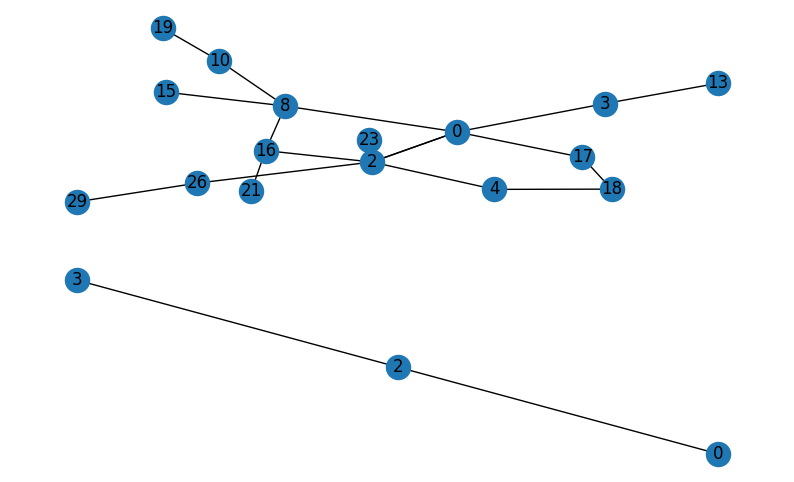

In [ ]:
posC = nx.spring_layout(G_com, seed = seed)
posP = nx.spring_layout(G_power, seed = seed)
plt.figure(figsize = (10,6))
plt.subplot(211)
nx.draw(G_com,pos = posC ,with_labels=True)
plt.subplot(212)
nx.draw(G_power, pos = posP,with_labels=True)
plt.show()

In [ ]:
removable_node = int(np.random.random() * G_power_nodes_Number)
while target == removable_node:
    removable_node = int(np.random.random() * G_power_nodes_Number)
Choice = np.random.random()
rm_node = removable_node
if Choice <0.5:
    print("first choice was Com and it is {}".format(removable_node))
    G_com.remove_node(rm_node)
    pp.drop_buses(net = Net,buses = [rm_node] , drop_elements=True)
    G_power = top.create_nxgraph(net=Net)
else:
    print("first choice was Pow and it is {}".format(removable_node))
    pp.drop_buses(net = Net,buses = [rm_node] , drop_elements=True)
    G_com.remove_node(rm_node)
    G_power = top.create_nxgraph(net=Net)

first choice was Pow and it is 9


In [ ]:
remove = 12
pp.drop_buses(net = Net,buses = [remove] , drop_elements=True)
G_com.remove_node(remove)
G_power = top.create_nxgraph(net=Net)

In [ ]:
G = G_power
target_node = target
# check the largest components
components_of_groph = sorted(nx.connected_components(G), key=len, reverse=True)
for component in components_of_groph:
    if target_node in component:
        G = G.subgraph(component)
G_power = G

In [ ]:
def Largest_component_with_target(Grf,target_node):
    # check the largest components
    components_of_groph = sorted(nx.connected_components(G), key=len, reverse=True)
    for component in components_of_groph:
        if target_node in component:
            G = G.subgraph(component)
    return G

In [ ]:
rm_nodes = set() - set()
casecading = True
while casecading:
    # print("2")
    G_com = Largest_component_with_target(G_com,target)
    G_power = Largest_component_with_target(G_power,target)
    End_minus_One_of_casecade = (len(G_com.nodes()),len(G_power.nodes()))
    set_nodes = set(G_com.nodes() - G_power.nodes())
    if len(set_nodes)==0:
        set_nodes = set(G_power.nodes() - G_com.nodes())
    # print("self.set_nodes",self.set_nodes)
    # print(self.set_nodes)
    if len(set_nodes) != 0:
        print("line 106 worked",set_nodes)
        Net = Casecade_in_pow(Net, set_nodes)
        G_power = top.create_nxgraph(Net)
        G_com = Casecade_in_com(G_com, set_nodes)
        # print("in line 127 ",self.G_com.nodes)
    End_of_casecade = (len(G_com.nodes()),len(G_power.nodes()))
    if End_minus_One_of_casecade == End_of_casecade:
        casecading = False
    # print(self.casecading)

In [ ]:
# Simulating the Casecading Failure
    # add some setting here


# creating the Power network

class Two_layerd_Network(object):
    def __init__(self, Nett, panda=None,list = None):


        # creating the Com network
            # creating Com from scrach (Scale free)
        # self.panda = panda
        Static_Net = Nett
        self.Net = Nett
        self.Static_Net = Nett
        self.seed = 1537
        self.alpha = 0.39
        self.beta = 0.1
        self.gamma = 1-(self.alpha + self.beta)
        if list != None and panda == None:
            print(21)
            self.information = self.remove_by_list(Static_Net,list)
        else:
            print(24)
            self.create_pow_network(self.Static_Net)
            self.create_com_network(self.Static_Net)
            self.posC = nx.spring_layout(self.G_com, seed = self.seed)
            self.posP = nx.spring_layout(self.G_power, seed = self.seed)
            if panda != None:
                self.plot_networks(self.G_com, self.G_power)
            self.initiam_com_nodes = self.G_com_nodes
            self.initiam_com_edges = self.G_com_edges
            self.initiam_pow_nodes = self.G_power.nodes()
            self.initiam_pow_edges = self.G_power.edges()
            if panda == None and list == None:
                self.G_com, self.Net = self.remove_nodes_Initaly_randomly(self.G_com, self.Net)
            if panda != None and list == None:
                self.remove = panda
                self.G_com, self.Net = self.remove_by_purpose(self.G_com, self.Net, self.remove)


            self.G_com, self.Net = self.Casecade(self.G_com, self.Net)
            self.G_power = top.create_nxgraph(self.Net)
            self.end_com_nodes = self.G_com.nodes()
            self.end_com_edges = self.G_com.edges()
            self.end_pow_nodes = self.G_power.nodes()
            self.end_pow_edges = self.G_power.edges()
            # print("self.removable_node",self.removable_node)
            # print("remainded node",len(self.end_com_nodes)/len(self.initiam_com_nodes))
            # print("remainded com edge",len(self.end_com_edges)/len(self.initiam_com_edges))
            # print("remainded pow edge",len(self.end_pow_edges)/len(self.initiam_pow_edges))
            if panda != None:
                self.plot_networks(self.G_com, self.G_power)
    def informations(self):
        return self.information
    def pandsa(self):
        panda = [self.removable_node,self.initiam_com_nodes,self.initiam_com_edges,self.initiam_pow_edges,self.end_com_nodes,self.end_com_edges,self.end_pow_edges]
        return panda
    def create_pow_network(self,Net):
        self.Static_Net = Net
        self.G_power = top.create_nxgraph(net=self.Static_Net)
        # extract some feature for future
        self.G_power_nodes = self.G_power.nodes()
        self.G_power_nodes_Number = len(self.G_power_nodes)
        self.G_power_edges = self.G_power.edges()
        self.target = int(self.Static_Net.ext_grid['bus'])
        # print("The target node [Controler in Com] [Ext in Pow] is node number: {}".format(self.target))
        # print("Pow settings are Done!")
        return self.G_power
    def create_com_network(self,Net):
        self.Static_node_of_power = len(Net.bus)
        self.G_scale_free = nx.scale_free_graph(n= self.Static_node_of_power, alpha= self.alpha, beta= self.beta, gamma= self.gamma, seed= self.seed, delta_in=1, delta_out=1 )
            # create Com from Scale free
        self.G_com_edges = self.G_scale_free.edges()
        self.G_com_edges_set = set(self.G_com_edges)
        self.G_com_edges_set_non_redundancy = []
        for G_edge in self.G_com_edges_set:
            if (G_edge[1],G_edge[0]) and (G_edge[0],G_edge[1]) not in self.G_com_edges_set_non_redundancy:
                if G_edge[1] != G_edge[0]:
                    self.G_com_edges_set_non_redundancy.append(G_edge)
        self.G_com = nx.MultiGraph()
        self.G_com.add_edges_from(self.G_com_edges_set_non_redundancy);
            # add a few work to this
        mapping = {0:self.target,self.target:0}
        self.G_com = nx.relabel_nodes(self.G_com, mapping)

        self.G_com_init = nx.MultiGraph()
        self.G_com_init.add_edges_from(self.G_com_edges_set_non_redundancy);
            # add a few work to this
        mapping = {0:self.target,self.target:0}
        self.G_com_init = nx.relabel_nodes(self.G_com_init, mapping)

        # extract initial information
        self.G_com_nodes = self.G_com_init.nodes()
        self.G_com_edges = self.G_com_init.edges()
        return self.G_com
        # print("Com Networks settings are Done!")
    # Now we have two Network in the first place
    # ---------------------------- Enable if you want rhe plot ----------------------------
    def plot_networks(self, G_com, G_power):
        plt.figure(figsize = (17,17))
        plt.subplot(211)
        self.G_com = G_com
        self.G_power = G_power
        # self.posC = nx.spring_layout(self.G_com, seed = self.seed)
        nx.draw(self.G_com,pos = self.posC ,with_labels=True)
        plt.subplot(212)
        # self.pos = nx.spring_layout(self.G_power, seed = self.seed)
        nx.draw(self.G_power, pos = self.posP,with_labels=True)
        plt.show()
    # -------------------------------------------------------------------------------------
        # choose what to remove and where to rmove
    def remove_nodes_Initaly_randomly(self,G_com,Net):
        self.Net = Net
        self.G_com = G_com
        self.removable_node = int(np.random.random() * self.G_power_nodes_Number)
        while self.target == self.removable_node:
            self.removable_node = int(np.random.random() * self.G_power_nodes_Number)
        self.Choice = np.random.random()
        rm_node = self.removable_node
        if self.Choice <0.5:
            # print("first choice was Com and it is {}".format(self.removable_node))
            self.G_com.remove_node(rm_node)
            pp.drop_buses(net = Net,buses = [rm_node] , drop_elements=True)
        else:
            # print("first choice was Pow and it is {}".format(self.removable_node))
            pp.drop_buses(net = Net,buses = [rm_node] , drop_elements=True)
            self.G_com.remove_node(rm_node)
        return self.G_com, self.Net

    def remove_by_list(self, Static_Net, list):
        print(132)

        Net = Static_Net
        p = top.create_nxgraph(Static_Net)
        G_comuni = self.create_pow_network(Static_Net)
        G_com = G_comuni
        initial_node = p.nodes()
        initial_pow_edges = p.edges()
        initial_com_edges = G_comuni.edges()
        information = pd.DataFrame()
        information['node'] = list
        information['initial_node'] = [len(initial_node) for _ in list]
        information['initial_pow_edges'] = [len(initial_pow_edges) for _ in list]
        information['initial_com_edges'] = [len(initial_com_edges) for _ in list]
        final_node = []
        final_pow_edges = []
        final_com_edges = []
        print(list)
        for remove in list:
            if remove == self.target:
                print(150)
                pass
            else:
                Network = pn.case30
                Net = Network()
                G_com = nx.MultiGraph(G_comuni)
                pp.drop_buses(net = Net,buses = [remove] , drop_elements=True)
                G_com.remove_node(remove)
                # G_com, Net = self.Casecade(G_com, Net)
            end_pow = top.create_nxgraph(Net)
            final_node.append(len(end_pow.nodes()))
            final_pow_edges.append(len(end_pow.edges()))
            final_com_edges.append(len(G_com.edges()))
        information['final_node'] = final_node
        information['final_pow_edges'] = final_pow_edges
        information['final_com_edges'] = final_com_edges
        # print(information['final_pow_edges'])
        return information

    def remove_by_purpose(self,G_com,Net,remove):
        self.Net = Net
        self.G_com = G_com
        pp.drop_buses(net = Net,buses = [remove] , drop_elements=True)
        self.G_com.remove_node(remove)
        return self.G_com, self.Net


    def Casecade(self,G_com,Net):
        self.G_com = G_com
        self.Net = Net
        self.G_power = top.create_nxgraph(net = self.Net)
        self.rm_nodes = set() - set()
        self.casecading = True
        while self.casecading:
            # print("2")
            self.G_com = self.Largest_component_with_target(self.G_com,self.target)
            self.G_power = self.Largest_component_with_target(self.G_power,self.target)
            End_minus_One_of_casecade = (len(self.G_com.nodes()),len(self.G_power.nodes()))
            self.set_nodes = set(self.G_com.nodes() - self.G_power.nodes())
            if len(self.set_nodes)==0:
                self.set_nodes = set(self.G_power.nodes() - self.G_com.nodes())
            # print("self.set_nodes",self.set_nodes)
            # print(self.set_nodes)
            if len(self.set_nodes) != 0:
                print("line 106 worked",self.set_nodes)
                self.Net = self.Casecade_in_pow(self.Net, self.set_nodes)
                self.G_power = top.create_nxgraph(self.Net)
                self.G_com = self.Casecade_in_com(self.G_com, self.set_nodes)
                # print("in line 127 ",self.G_com.nodes)
            End_of_casecade = (len(self.G_com.nodes()),len(self.G_power.nodes()))
            if End_minus_One_of_casecade == End_of_casecade:
                self.casecading = False
            # print(self.casecading)
        return self.G_com, self.Net

    def Casecade_in_pow(self,Net,nodes):
        self.Net = Net
        # instance_grph = top.create_nxgraph(self.Net)
        # instance_nodes = set(instance_grph.nodes())
        self.node = nodes
        if len(self.node) == 0:
            # self.node = instance_nodes - nodes
            self.busses = []
        elif len(self.node) == 1:
            self.busses = self.node
        else:

            self.busses = list(self.node)
        try:
            pp.drop_buses(self.Net,buses=self.busses,drop_elements = True)
        except:pass
        pp.rundcpp(self.Net)
        self.drop_lines = pp.overloaded_lines(self.Net)
        while len(self.drop_lines) !=0:
            # print("3")
            pp.drop_lines(self.Net,self.drop_lines)
            self.drop_lines = pp.overloaded_lines(self.Net)
            # print("line 135 worked.",self.drop_lines)
        g_inst = top.create_nxgraph(self.Net)
        g_inst_2 = self.Largest_component_with_target(g_inst,self.target)
        set_nodes_2 = set(g_inst) - set(g_inst_2)
        pp.drop_buses(self.Net,set_nodes_2,drop_elements = True)
        return self.Net

    def Casecade_in_com(self,G_com,nodes):
        self.G_com = G_com
        self.node = nodes
        if len(self.node)!=0:
            self.G_com = nx.MultiGraph(self.G_com)
            nx.is_frozen(self.G_com)
            self.G_com.remove_nodes_from(self.node)
        return self.G_com

    def removal(self,Graph):
        pass


    def Largest_component_with_target(self,target_Graph,target_node):
        self.G = target_Graph
        self.target_node = target_node
        # check the largest components
        self.components_of_groph = sorted(nx.connected_components(self.G), key=len, reverse=True)
        for component in self.components_of_groph:
            if self.target_node in component:
                self.G = self.G.subgraph(component)
        return self.G

if __name__ == "__main__":
    removed_node = []
    initiam_nodes = []
    initiam_com_edges = []
    initiam_pow_edges = []
    end_nodes = []
    end_com_edges = []
    end_pow_edges = []
    pandas = pd.DataFrame()
    controler = 2
    if controler == 1:
        panda = []
        Network = pn.case30
        Net = Network()
        panda = 1
        Two = Two_layerd_Network(Net,panda)
    elif controler == 2:
        Network = pn.case30
        Net = Network()
        # tr = int(Net.ext_grid['bus'])
        list = [i for i in range(len(Net.bus))]
        print(list)
        Two = Two_layerd_Network(Net,list = list)
        info = Two.informations()
    else:
        for init in range(30):
            # self.panda = [self.initiam_com_nodes,self.initiam_com_edges,self.initiam_pow_edges,self.end_com_nodes,self.end_com_edges,self.end_pow_edges]
            panda = []
            Network = pn.case30
            Net = Network()
            Two = Two_layerd_Network(Net)
            removed_node.append(Two.pandsa()[0])
            initiam_nodes.append(Two.pandsa()[1])
            initiam_com_edges.append(Two.pandsa()[2])
            initiam_pow_edges.append(Two.pandsa()[3])
            end_nodes.append(Two.pandsa()[4])
            end_com_edges.append(Two.pandsa()[5])
            end_pow_edges.append(Two.pandsa()[6])
        pandas['removed_node']=removed_node
        pandas['initiam_nodes']=initiam_nodes
        pandas['initiam_com_edges']=initiam_com_edges
        pandas['initiam_pow_edges']=initiam_pow_edges
        pandas['end_nodes']=end_nodes
        pandas['end_com_edges']=end_com_edges
        pandas['end_pow_edges']=end_pow_edges
